# Modelo SIEARD

O modelo compartimental SIEARD representa a progressão da epidemia com os seguintes grupos:

- S(t): suscetíveis
- \( E(t) \): expostos (infectados, incubando, ainda não contagiosos)
- \( I(t) \): infectados assintomáticos (não detectados, mas contagiosos)
- \( A(t) \): infectados sintomáticos (detectáveis, contagiosos)
- \( R(t) \): recuperados
- \( D(t) \): mortos

População total:

$$
N = S + E + I + A + R + D
$$

---

### 📐 Equações diferenciais

$$
\begin{aligned}
\frac{dS}{dt} &= -\beta_I \cdot \frac{S I}{N} - \beta_A \cdot \frac{S A}{N} \\\\
\frac{dE}{dt} &= \beta_I \cdot \frac{S I}{N} + \beta_A \cdot \frac{S A}{N} - \sigma E \\\\
\frac{dI}{dt} &= p \cdot \sigma E - \gamma_I I \\\\
\frac{dA}{dt} &= (1 - p) \cdot \sigma E - \gamma_A A - \mu A \\\\
\frac{dR}{dt} &= \gamma_I I + \gamma_A A \\\\
\frac{dD}{dt} &= \mu A
\end{aligned}
$$

---

### 📋 Parâmetros

- \( \beta_I \): taxa de transmissão dos assintomáticos  
- \( \beta_A \): taxa de transmissão dos sintomáticos  
- \( \sigma \): taxa de progressão dos expostos para infecciosos  
- \( p \): fração dos expostos que se tornam assintomáticos  
- \( \gamma_I \): taxa de recuperação dos assintomáticos  
- \( \gamma_A \): taxa de recuperação dos sintomáticos  
- \( \mu \): taxa de mortalidade dos sintomáticos

---

### 📊 Casos acumulados

Número total de casos clínicos (detectáveis) ao longo do tempo:

$$
C(t) = A(t) + R(t) + D(t)
$$

Taxa de novos casos clínicos por unidade de tempo:

$$
\frac{dC}{dt} = (1 - p) \cdot \sigma E
$$

---

### 📐 População total

A população total em cada instante é:

$$
N(t) = S(t) + E(t) + I(t) + A(t) + R(t)
$$

**Observação importante:** O compartimento \( D(t) \) representa **óbitos** e não faz mais parte da população viva. Portanto:

- Se considerarmos que **não há natalidade ou mortalidade natural**, então:
  
  $$
  N(t) = N_0 - D(t)
  $$

- Isso significa que \( N(t) \) **não é constante**, pois a população **diminui** com o tempo conforme ocorrem mortes por COVID-19 (ou outra doença).

---

### ✅ Reescrevendo as equações com \( N(t) = N_0 - D(t) \)

Se quisermos deixar isso explícito nas equações:

$$
\begin{aligned}
\frac{dS}{dt} &= -\beta_I \cdot \frac{S I}{N(t)} - \beta_A \cdot \frac{S A}{N(t)} \\\\
\frac{dE}{dt} &= \beta_I \cdot \frac{S I}{N(t)} + \beta_A \cdot \frac{S A}{N(t)} - \sigma E \\\\
\frac{dI}{dt} &= p \cdot \sigma E - \gamma_I I \\\\
\frac{dA}{dt} &= (1 - p) \cdot \sigma E - \gamma_A A - \mu A \\\\
\frac{dR}{dt} &= \gamma_I I + \gamma_A A \\\\
\frac{dD}{dt} &= \mu A
\end{aligned}
$$

Com:

$$
N(t) = S(t) + E(t) + I(t) + A(t) + R(t)
$$

Ou alternativamente:

$$
N(t) = N_0 - D(t)
$$

---



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import modelos_epidemiologicos as model 

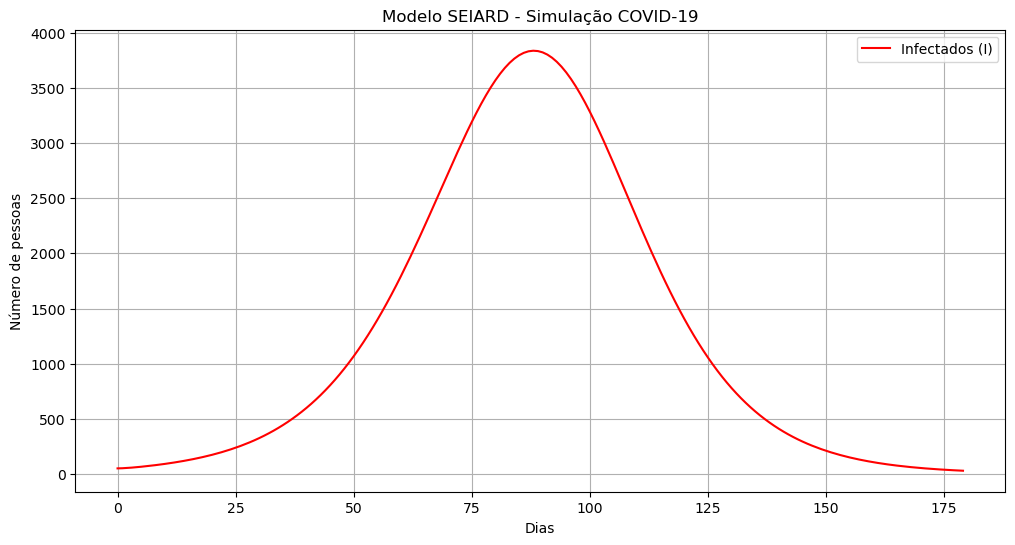

88.0 3838.2711961208033


In [2]:
# Definindo parametros da população

# Parâmetros (COVID-19 exemplo)
N = 100000       # População total
beta    = 0.5          # Taxa de transmissão (sintomáticos)
alpha   = 1/5.2       # Taxa de incubação
gamma_I = 1/10      # Recuperação sintomáticos (10 dias)
gamma_A = 1/7       # Recuperação assintomáticos (7 dias)
rho     = 0.2         # 20% assintomáticos
kappa   = 0.5         # Transmissão relativa de assintomáticos
delta_I = 0.2         #Taxa de mortalidade (1%)

# Condições iniciais
E0 = 100            # 100 expostos inicialmente
I0 = 50             # 50 infectados sintomáticos
A0 = 30             # 30 assintomáticos
R0 = 0
D0 = 0
S0 = N - E0 - I0 - A0 - R0-D0
y0 = [S0, E0, I0, A0, R0, D0]  

# Simulação
t = np.linspace(0, 179, 180)
out = odeint(model.SEIARD, y0, t, args=(N, beta, kappa, alpha, rho, gamma_I, gamma_A, delta_I))
S,E,I,A,R,D = out.T 

# Plotagem
plt.figure(figsize=(12, 6))
#plt.plot(t, S, label='Suscetíveis (S)')
plt.plot(t, I, 'r-', label='Infectados (I)')
#plt.plot(t, D, 'k--', label='Óbitos (D)')
#plt.plot(t, R, 'y-', label='recuperados(D)')

plt.xlabel('Dias')
plt.ylabel('Número de pessoas')
plt.title('Modelo SEIARD - Simulação COVID-19')
plt.legend()
plt.grid()
plt.show()


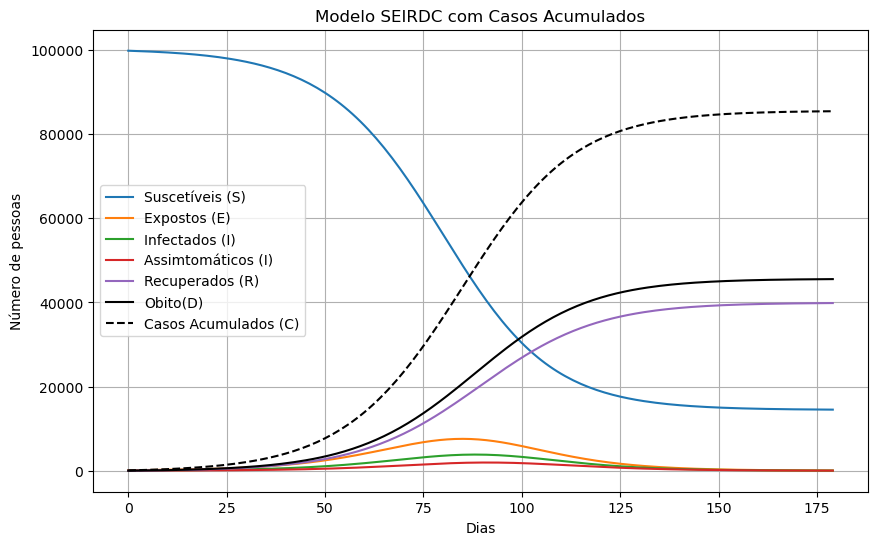

88.0 3838.2711961208033


In [3]:
# Parâmetros (COVID-19 exemplo)
# Parâmetros (COVID-19 exemplo)
N = 100000       # População total
beta    = 0.5          # Taxa de transmissão (sintomáticos)
alpha   = 1/5.2       # Taxa de incubação
gamma_I = 1/10      # Recuperação sintomáticos (10 dias)
gamma_A = 1/7       # Recuperação assintomáticos (7 dias)
rho     = 0.2         # 20% assintomáticos
kappa   = 0.5         # Transmissão relativa de assintomáticos
delta_I = 0.2         #Taxa de mortalidade (1%)

# Condições iniciais
E0 = 100            # 100 expostos inicialmente
I0 = 50             # 50 infectados sintomáticos
A0 = 30             # 30 assintomáticos
R0 = 0
D0 = 0
C0 = I0 + A0        # Casos acumulados iniciais = I0 + A0
S0 = N - E0 - I0 - A0 - R0-D0

y0 = [S0, E0, I0, A0, R0,D0,C0]
# Tempo (dias)
t = np.linspace(0, 179, 180)

# Resolver as EDOs
out = odeint(model.SEIARDC, y0, t, args=(N, beta, kappa, alpha, rho, gamma_I, gamma_A, delta_I))

S,E,I,A,R,D,C = out.T 

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Suscetíveis (S)')
plt.plot(t, E, label='Expostos (E)')
plt.plot(t, I, label='Infectados (I)')
plt.plot(t, A, label='Assimtomáticos (I)')
plt.plot(t, R, label='Recuperados (R)')
plt.plot(t, D, 'k',label='Obito(D)')
plt.plot(t, C, 'k--', label='Casos Acumulados (C)')
plt.xlabel('Dias')
plt.ylabel('Número de pessoas')
plt.title('Modelo SEIRDC com Casos Acumulados')
plt.legend()
plt.grid()
plt.show()
